In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [4]:
url = 'https://raw.githubusercontent.com/justmarkham/DAT8/master/data/chipotle.tsv'
    
chipo = pd.read_csv(url, sep = '\t')

In [7]:
chipo.head(10)

,order_id,quantity,item_name,choice_description,item_price
0,1,1,Chips and Fresh Tomato Salsa,NaN,$2.39
1,1,1,Izze,[Clementine],$3.39
2,1,1,Nantucket Nectar,[Apple],$3.39
3,1,1,Chips and Tomatillo-Green Chili Salsa,NaN,$2.39
4,2,2,Chicken Bowl,"[Tomatillo-Red Chili Salsa (Hot), [Black Beans...",$16.98
5,3,1,Chicken Bowl,"[Fresh Tomato Salsa (Mild), [Rice, Cheese, Sou...",$10.98
6,3,1,Side of Chips,NaN,$1.69
7,4,1,Steak Burrito,"[Tomatillo Red Chili Salsa, [Fajita Vegetables...",$11.75
8,4,1,Steak Soft Tacos,"[Tomatillo Green Chili Salsa, [Pinto Beans, Ch...",$9.25
9,5,1,Steak Burrito,"[Fresh Tomato Salsa, [Rice, Black Beans, Pinto...",$9.25


In [6]:
chipo.shape

(4622, 5)

In [ ]:
# 1. Create a histogram of the top 5 items bought
#title: Most ordered Chipotle's Items, xlabel: Items, ylabel: Number of Times Ordered

In [10]:
chipo.item_name.value_counts()[:5]    #value_counts : sorted result: descending

Chicken Bowl           726
Chicken Burrito        553
Chips and Guacamole    479
Steak Burrito          368
Canned Soft Drink      301
Name: item_name, dtype: int64

In [15]:
chipo.groupby('item_name').sum()['quantity'].sort_values(ascending=False)[:5]

item_name
Chicken Bowl           761
Chicken Burrito        591
Chips and Guacamole    506
Steak Burrito          386
Canned Soft Drink      351
Name: quantity, dtype: int64

In [36]:
df = chipo.pivot_table(index = 'item_name', values = 'quantity', aggfunc = 'sum').sort_values(by='quantity',ascending = False)[:5]

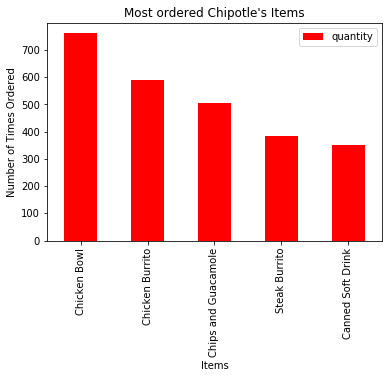

In [23]:
df.plot(kind = 'bar', color = 'red')
plt.xlabel('Items')
plt.ylabel('Number of Times Ordered')
plt.title('Most ordered Chipotle\'s Items')
plt.show()


In [43]:
df.reset_index()

,item_name,quantity
0,Chicken Bowl,761
1,Chicken Burrito,591
2,Chips and Guacamole,506
3,Steak Burrito,386
4,Canned Soft Drink,351


(array([  0., 100., 200., 300., 400., 500., 600., 700., 800.]),
 <a list of 9 Text yticklabel objects>)

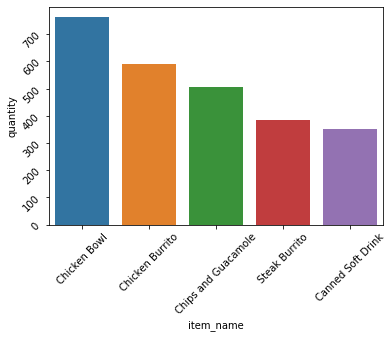

In [53]:
sns.barplot(df.index, df['quantity'])
plt.xticks(rotation = 45)
plt.yticks(rotation = 45)

(array([0, 1, 2, 3, 4]), <a list of 5 Text yticklabel objects>)

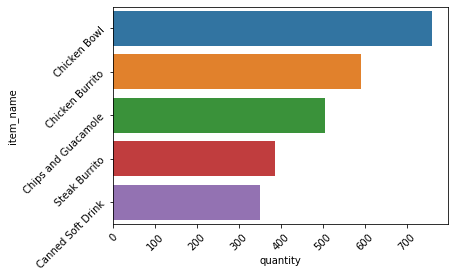

In [50]:
sns.barplot(df['quantity'],df.index,  orient = 'h')
plt.xticks(rotation = 45)
plt.yticks(rotation = 45)

In [ ]:
#Create a scatterplot with the number of items orderered per order price
#xlabel: Order Price
#ylabel:Items ordered
#title : Number of items ordered per order price

In [55]:
chipo.head(10)

,order_id,quantity,item_name,choice_description,item_price
0,1,1,Chips and Fresh Tomato Salsa,NaN,$2.39
1,1,1,Izze,[Clementine],$3.39
2,1,1,Nantucket Nectar,[Apple],$3.39
3,1,1,Chips and Tomatillo-Green Chili Salsa,NaN,$2.39
4,2,2,Chicken Bowl,"[Tomatillo-Red Chili Salsa (Hot), [Black Beans...",$16.98
5,3,1,Chicken Bowl,"[Fresh Tomato Salsa (Mild), [Rice, Cheese, Sou...",$10.98
6,3,1,Side of Chips,NaN,$1.69
7,4,1,Steak Burrito,"[Tomatillo Red Chili Salsa, [Fajita Vegetables...",$11.75
8,4,1,Steak Soft Tacos,"[Tomatillo Green Chili Salsa, [Pinto Beans, Ch...",$9.25
9,5,1,Steak Burrito,"[Fresh Tomato Salsa, [Rice, Black Beans, Pinto...",$9.25


In [58]:
chipo['item_price'].dtype

dtype('O')

In [63]:
'$abc'.replace('$','')

'abc'

In [74]:
chipo['item_price'].str.replace('$','').astype('float')

0        2.39
1        3.39
2        3.39
3        2.39
4       16.98
        ...  
4617    11.75
4618    11.75
4619    11.25
4620     8.75
4621     8.75
Name: item_price, Length: 4622, dtype: float64

In [75]:
chipo['item_price']=chipo.item_price.map(lambda x:float(x.replace('$','')))


In [76]:
chipo['item_price']

0        2.39
1        3.39
2        3.39
3        2.39
4       16.98
        ...  
4617    11.75
4618    11.75
4619    11.25
4620     8.75
4621     8.75
Name: item_price, Length: 4622, dtype: float64

In [ ]:
for i in chipo['item_price']:
    i=i.replace('$','')
    print(i)

In [ ]:
chipo['item_price']= chipo.item_price.str.replace('$','',regex=True)

In [ ]:
chipo.item_price.str[1:].astype('float')

In [84]:
orders= chipo.groupby('order_id').sum()

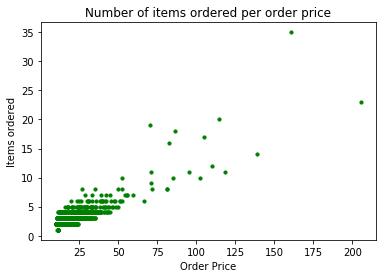

In [87]:
plt.scatter(x = orders.item_price, y = orders.quantity, s = 10, c = 'green')
# Set the title and labels
plt.xlabel('Order Price')
plt.ylabel('Items ordered')
plt.title('Number of items ordered per order price')
plt.show()

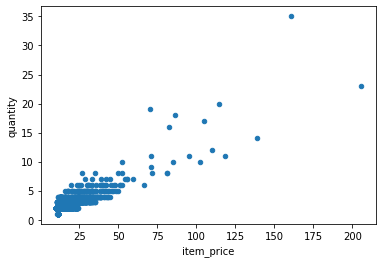

In [90]:
orders.plot.scatter(x ='item_price',y ='quantity')


In [88]:
# Show if there are any outliers in the item_price column

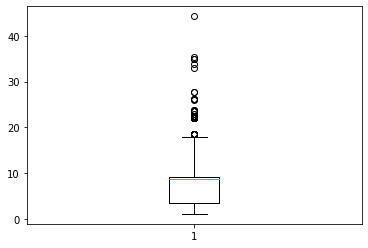

In [91]:
plt.boxplot(chipo.item_price)
plt.show()

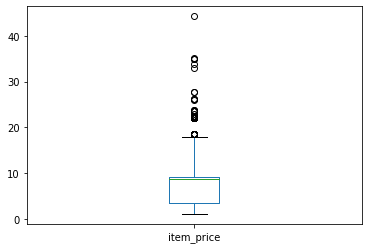

In [92]:
chipo['item_price'].plot(kind = 'box')
plt.show()

In [93]:
#Write a code to show a heatmap that represents the Correlation between the columns for the above dataset.

(3.0, 0.0)

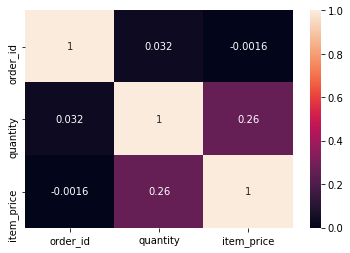

In [101]:
cmatrix = chipo.corr()
ax = sns.heatmap(cmatrix,annot=True)
top, bottom = ax.get_ylim()
ax.set_ylim(top + 0.5, bottom - 0.5)

In [102]:
cmatrix

,order_id,quantity,item_price
order_id,1.000000,0.032397,-0.001618
quantity,0.032397,1.000000,0.263981
item_price,-0.001618,0.263981,1.000000


In [103]:
chipo.head()

,order_id,quantity,item_name,choice_description,item_price
0,1,1,Chips and Fresh Tomato Salsa,NaN,2.39
1,1,1,Izze,[Clementine],3.39
2,1,1,Nantucket Nectar,[Apple],3.39
3,1,1,Chips and Tomatillo-Green Chili Salsa,NaN,2.39
4,2,2,Chicken Bowl,"[Tomatillo-Red Chili Salsa (Hot), [Black Beans...",16.98


In [104]:
#Now import the titanic dataset as we did before

In [106]:
titanic = pd.read_csv('titanic_train.csv')

In [107]:
titanic.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [108]:
#Create a lmplot with the Fare payed and the Age, differ the plot color by gender

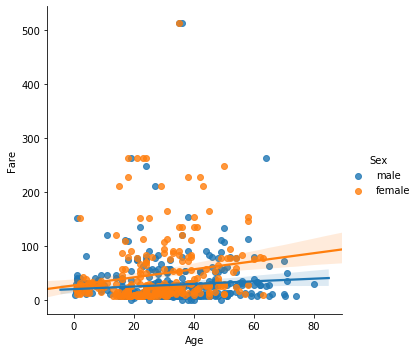

In [121]:
sns.lmplot(data=titanic,x='Age',y='Fare',hue='Sex')


In [ ]:
sns.lmplot(data=titanic,x='Age',y='Fare',hue='Sex', col= 'Embarked')


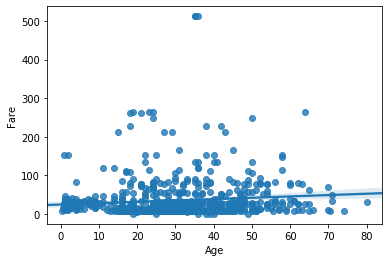

In [114]:
sns.regplot(data=titanic,x='Age',y='Fare')


In [ ]:
# Create a pie chart presenting the male/female proportion: 
#give labels to pies: male and female, colors: blue, red, with one slide exploded out,
# with the percent listed as a fraction, title: Sex Proportion

In [148]:
male = (titanic['Sex'] == 'male').sum()
female = (titanic['Sex']=='female').sum()
male

577

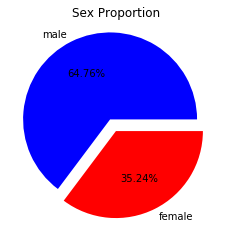

In [141]:
plt.pie(titanic['Sex'].value_counts(), explode=(0.15,0), colors = ['blue','red'], labels=['male', 'female'], autopct='%1.2f%%')
plt.title('Sex Proportion')
plt.show()

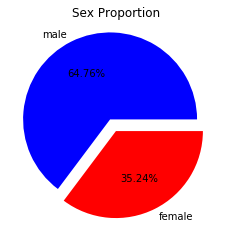

In [149]:
plt.pie((male,female), explode=(0.15,0), colors = ['blue','red'], labels=['male', 'female'], autopct='%1.2f%%')
plt.title('Sex Proportion')
plt.show()

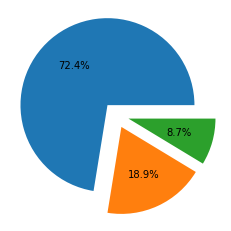

In [156]:
plt.pie(titanic['Embarked'].value_counts(), explode=(0.15,0.15,0.15), autopct= '%1.1f%%')
plt.show()

In [150]:
# Create a histogram with the Fare payed
## create bins interval using numpy.arange: 10 bins from 100-600, 
# xlabel:Fare
# ylabel:Frequency
#title:Fare Payed Histrogram


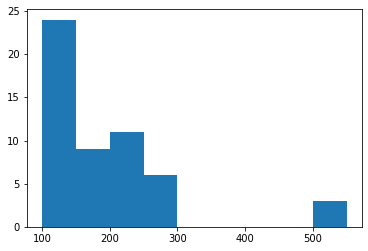

In [175]:
import numpy as np

plt.hist(titanic.Fare.sort_values(ascending=False),bins= np.arange(100,600,50))
plt.show()

In [168]:
np.arange(100,600,50)

array([100, 150, 200, 250, 300, 350, 400, 450, 500, 550])

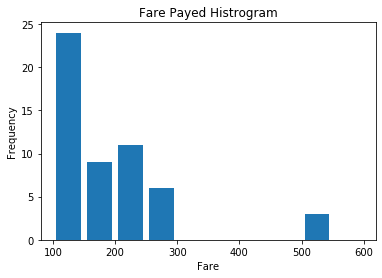

In [174]:
plt.hist(titanic['Fare'] , bins=np.arange(100,601,50) , rwidth= 0.8)
plt.xlabel('Fare')
plt.ylabel('Frequency')
plt.title('Fare Payed Histrogram')
plt.show()

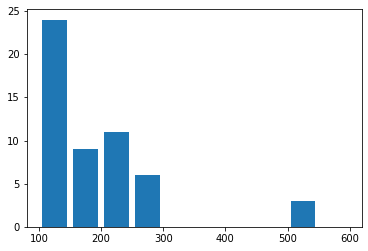

In [179]:
plt.hist(titanic.Fare.sort_values(),bins=10,range=(100,600),rwidth=0.8)
plt.show()

In [180]:
path = 'https://raw.githubusercontent.com/guipsamora/pandas_exercises/master/07_Visualization/Online_Retail/Online_Retail.csv'

online_rt = pd.read_csv(path, encoding = 'latin1')

online_rt.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,12/1/10 8:26,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,12/1/10 8:26,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,12/1/10 8:26,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,12/1/10 8:26,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,12/1/10 8:26,3.39,17850.0,United Kingdom


In [ ]:
#Create a bar plot with the 10 countries that have the most 'Quantity' ordered except UK
#xlabel:Countries
#ylabel:Quantity
#title:10 Countries with most orders

In [181]:
#group by the country and add the quantity
countries = online_rt.groupby('Country').sum()

In [188]:
countries = countries.sort_values(by= 'Quantity', ascending = False)[1:11]

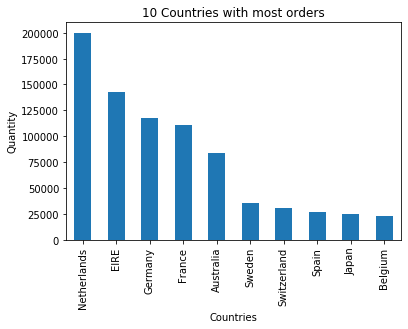

In [192]:
countries['Quantity'].plot(kind='bar')
plt.xlabel('Countries')
plt.ylabel('Quantity')
plt.title('10 Countries with most orders')
plt.show()

In [193]:
#  Exclude negative Quantity entries from the online_rt table

In [198]:
online_rt[online_rt["Quantity"]>=0]

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,12/1/10 8:26,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,12/1/10 8:26,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,12/1/10 8:26,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,12/1/10 8:26,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,12/1/10 8:26,3.39,17850.0,United Kingdom
...,...,...,...,...,...,...,...,...
541904,581587,22613,PACK OF 20 SPACEBOY NAPKINS,12,12/9/11 12:50,0.85,12680.0,France
541905,581587,22899,CHILDREN'S APRON DOLLY GIRL,6,12/9/11 12:50,2.10,12680.0,France
541906,581587,23254,CHILDRENS CUTLERY DOLLY GIRL,4,12/9/11 12:50,4.15,12680.0,France
541907,581587,23255,CHILDRENS CUTLERY CIRCUS PARADE,4,12/9/11 12:50,4.15,12680.0,France


In [199]:
# Create a scatterplot with the Quantity per UnitPrice by CustomerID and country for the top 3 Countries 
#as above question (except UK)
#Use subplots/ facetgrid

In [237]:
cust = online_rt.groupby(['CustomerID', 'Country']).sum()
cust

,,Quantity,UnitPrice
CustomerID,Country,,
12346.0,United Kingdom,0,2.08
12347.0,Iceland,2458,481.21
12348.0,Finland,2341,178.71
12349.0,Italy,631,605.10
12350.0,Norway,197,65.30
...,...,...,...
18280.0,United Kingdom,45,47.65
18281.0,United Kingdom,54,39.36
18282.0,United Kingdom,98,62.68


In [238]:
top3 = countries[:3]

In [239]:
top3.index

Index(['Netherlands', 'EIRE', 'Germany'], dtype='object', name='Country')

In [204]:
#filter the cust dataframe with the top3 countries

In [227]:
cust

,,Quantity,UnitPrice
CustomerID,Country,,
12346.0,United Kingdom,0,2.08
12347.0,Iceland,2458,481.21
12348.0,Finland,2341,178.71
12349.0,Italy,631,605.10
12350.0,Norway,197,65.30
...,...,...,...
18280.0,United Kingdom,45,47.65
18281.0,United Kingdom,54,39.36
18282.0,United Kingdom,98,62.68


In [229]:
cust['Country'] = cust.index.get_level_values(1)
cust

,,Quantity,UnitPrice,Country
CustomerID,Country,,,
12346.0,United Kingdom,0,2.08,United Kingdom
12347.0,Iceland,2458,481.21,Iceland
12348.0,Finland,2341,178.71,Finland
12349.0,Italy,631,605.10,Italy
12350.0,Norway,197,65.30,Norway
...,...,...,...,...
18280.0,United Kingdom,45,47.65,United Kingdom
18281.0,United Kingdom,54,39.36,United Kingdom
18282.0,United Kingdom,98,62.68,United Kingdom


In [230]:
customers = cust[cust['Country'].isin(top3.index)]
customers

,,Quantity,UnitPrice,Country
CustomerID,Country,,,
12426.0,Germany,258,118.09,Germany
12427.0,Germany,236,161.17,Germany
12468.0,Germany,364,139.07,Germany
12471.0,Germany,7965,2266.87,Germany
12472.0,Germany,4020,970.12,Germany
...,...,...,...,...
14016.0,EIRE,2124,648.63,EIRE
14156.0,EIRE,57025,6544.29,EIRE
14335.0,Germany,379,144.24,Germany


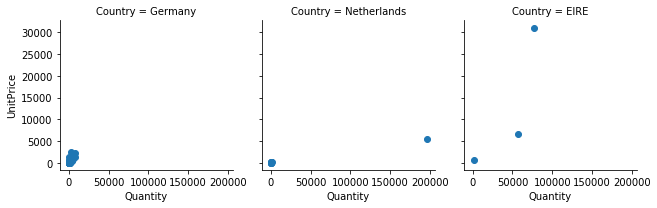

In [242]:
fg = sns.FacetGrid(customers, col='Country')
fg.map(plt.scatter, 'Quantity', 'UnitPrice', alpha = 1)
fg.add_legend()

In [243]:
# Add a column to online_rt called Revenue calculate the revenue (Quantity * UnitPrice) from each sale.

In [245]:
online_rt['Revenue']=online_rt['Quantity']*online_rt['UnitPrice']


In [244]:
# Write a code to show the boxplot for unit price column for online dataset.[Use Seaborn].

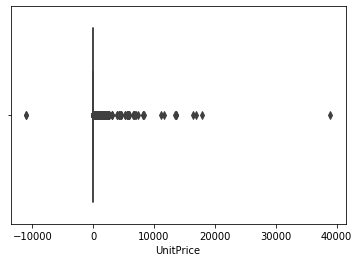

In [246]:
sns.boxplot(online_rt.UnitPrice)

In [ ]:
#Write a code to show the distplot on revenue column for above dataset excluding the kde plot and showing rug.[using seaborn]

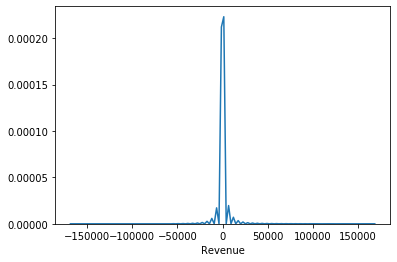

In [257]:
sns.distplot(online_rt.Revenue, kde= True, rug = False, hist = False)

In [250]:
# Write a code to show the regressionplot on x-axis='quantity',y-axis='unit_price' for above dataset including 
#   'marker' and color was green.[using seaborn]

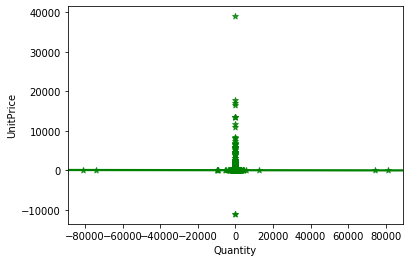

In [254]:
sns.regplot(data=online_rt,
            y="UnitPrice",
            x="Quantity",
            marker='*',
           color='g')

# Display the plot
plt.show()

In [258]:
#use below dataset
import pandas as pd
raw_data = {'first_name': ['Jason', 'Molly', 'Tina', 'Jake', 'Amy'], 
            'last_name': ['Miller', 'Jacobson', 'Ali', 'Milner', 'Cooze'], 
            'female': [0, 1, 1, 0, 1],
            'age': [42, 52, 36, 24, 73], 
            'preTestScore': [4, 24, 31, 2, 3],
            'postTestScore': [25, 94, 57, 62, 70]}

df = pd.DataFrame(raw_data, columns = ['first_name', 'last_name', 'age', 'female', 'preTestScore', 'postTestScore'])

df

,first_name,last_name,age,female,preTestScore,postTestScore
0,Jason,Miller,42,0,4,25
1,Molly,Jacobson,52,1,24,94
2,Tina,Ali,36,1,31,57
3,Jake,Milner,24,0,2,62
4,Amy,Cooze,73,1,3,70


In [259]:
#.Write a code to show swarmplot on x-axis-'female' and y-axis-'age' for automobile dataset.

In [260]:
#Create a Scatterplot of preTestScore and postTestScore, with the size of each point determined by age :use matplotlib
#title:preTestScore x postTestScore")
#xlabel:preTestScore
#ylabel:preTestScore

In [261]:
# Create a Scatterplot of preTestScore and postTestScore.
# This time the size should be 4.5 times the postTestScore and the color determined by sex
#use above title

In [262]:
# Write a code to show boxplot on x-axis-'female' and y-axis-'pre_testscore' for above dataset`.[use seaborn]**

In [263]:
#Write a code to show violinplot on x-axis-'female' and y-axis-'posttestscore' for above dataset 
#where palette is 'hls'.[use seaborn]

In [264]:
# Write a code to show jointplot on x-axis-'pretestscore' and y-axis-'posttestscore' for above dataset
# where kind is 'resid'. [use seaborn]

##### 26. Take a Dataset : Plot the various graphs to get insights of the data
Data contains information about: R&D Spend, Administration Spend, Marketing Spend and the Profits of 50 different startups along with the State from where startups are working. 
   1.	Find which expenditures of startups affects most to the Profit.
   2.	Find the expenditures which are correlated.
   3.	Which State startups are earning more profits?


##### Topics covered here : pandas, matplotlib,seaborn

In [266]:
#use the dataset from teh google drive that has the name as startup50